Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05b: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, June 06, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Covariance and autocorrelation matrix [5 Points]

**a)** Recap: What is the covariance matrix? What do the different entries of the matrix mean? 

### What it is:
In probability theory and statistics, a covariance matrix (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, i.e., the covariance of each element with itself.

Intuitively, the covariance matrix generalizes the notion of variance to multiple dimensions. As an example, the variation in a collection of random points in two-dimensional space cannot be characterized fully by a single number, nor would the variances in the $x$ and $y$ directions contain all of the necessary information; a $2\times 2$ matrix would be necessary to fully characterize the two-dimensional variation. 

### What its entries mean:
* $\forall a_{ij} \in M, i \neq j$ is $a_{ij}$ the covariance of the $i$-th random variable with the $j$-th random variable.
* $\forall a_{ij} \in M, i = j$ is $a_{ij}$ the variance of one of the random variables.

**b)** What can the covariance matrix be used for? Name at least two applications.

* The covariance matrix is a useful tool in many different areas. From it a transformation matrix can be derived, called a whitening transformation, that allows one to completely decorrelate the data or, from a different point of view, to find an optimal basis for representing the data in a compact way (PCA).

* The covariance matrix plays a key role in financial economics, especially in portfolio theory and its mutual fund separation theorem and in the capital asset pricing model. The matrix of covariances among various assets' returns is used to determine, under certain assumptions, the relative amounts of different assets that investors should (in a normative analysis) or are predicted to (in a positive analysis) choose to hold in a context of diversification. 

**c)** Execute the next cell. You can see three data sets. Which of the three covariance matrices below belongs to which plot?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))
factors = [0.5,1,0]
names = ["a", "b", "c"]
datasets = []
for i, factor in enumerate(factors):
    x = np.array(np.arange(100).tolist() + np.arange(100).tolist())
    if factor!=0:
        y = x * factor + (np.random.rand(len(x))-0.5)*30
    else:
        y = np.array([50 for _ in range(len(x))]) + (np.random.rand(len(x))-0.5)*30
    plt.subplot(1,len(factors),i+1)
    plt.scatter(x,y)
    plt.title("Dataset "+names[i], fontsize = 30)
    plt.xlabel("x", fontsize = 20)
    plt.ylabel("y", fontsize = 20)
    plt.ylim(0, 100)
    plt.xlim(0, 100)
    datasets.append(np.stack([x, y], axis = 1))
plt.show()

**Covariance matrix I:**

| C1    |  x  |  y  |
|-------|-----|-----|
| **x** | 837 | 877 |
| **y** | 877 | 989 |

**Covariance matrix II:**

 | C2 | x | y |
 | ---|---|---|
 |   **x** |  837 | 1  |
 |   **y**| 1  |  66 |


**Covariance matrix III:**

| C3 | x | y |
| ---|---|---|
|   **x** |  837 | 453  |
|   **y**| 453  |  318 |


A -> III  
B -> I  
C -> II

**d)** Implement the formula for the autocorrelation matrix

$$ A = \frac{1}{|D|} \sum_{\overrightarrow{x} \in D} (\frac{(\overrightarrow{x} - \overrightarrow{\mu})}{\overrightarrow{s}})^T \frac{(\overrightarrow{x}- \overrightarrow{\mu})}{\overrightarrow{s}} $$

Hint: For your implementation, it might be more efficient to divide by the matrix of standard deviations in the end. The matrix of standard deviations for two dimensions looks like this:

| S | x | y |
| ---|---|---|
|   **x** |  $$s_{x}s_{x}$$| $$s_{x}s_{y}$$ |
|   **y**| $$s_{y}s_{x}$$ |  $$s_{y}s_{y}$$ |


Make sure to make your implementation work for more than two dimensional data as well!

Then execute the cell below which shows the autocorrelation matrices for the datasets of task c.

In [7]:
def autocorrelation(data):
    """
    Input is an array of the form number_data * dimensions
    An example is shown when this cell is executed
    """
    # YOUR CODE HERE
    # means for covariance matrix
    mu_s = []
    for (x, y), value in np.ndenumerate(data):
        mu_s.append(np.mean(data[x]))
    mu_s = np.array(mu_s)
    # the autocovariance of the means
    covar_mu_s = mu_s.T @ mu_s
    
    
## DELETE COMMENTS TO SHOW THE DATA USED FOR ASSERTION 
#example_x = [2,2,2]
#example_y = [1,2,3]
#example_data = np.stack([[1,2,3], [2,2,2]], axis=1)
#plt.scatter(example_x, example_y)
#plt.show()

test_data1 = np.stack([[1,2,3], [2,2,2]], axis=1)
cor1 = autocorrelation(test_data1)
real_cor1 = [[1.0, 0.0], [0.0, 0.0]]

test_data2 = np.stack([[1,2,3], [4,5,6]], axis=1)
cor2 = autocorrelation(test_data2)
real_cor2 = [[1,1], [1,1]]

assert np.allclose(cor1, real_cor1), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor1, cor1)
assert np.allclose(cor2, real_cor2), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor2, cor2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# the data of task c is saved in a list called datasets
for i, d in enumerate(datasets):
    print("Autocorrelation matrix for data set", names[i], "\n", autocorrelation(d), "\n")

**e)** What is the difference between the autocorrelation matrix and covariance matrix? When should it be used?

YOUR ANSWER HERE

## Assignment 2: Local PCA (5 Points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

In [ ]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.decomposition import PCA

np.random.seed(42)

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2, 2], [[0.1, 0], [0, 1]], 100),
                  multNorm([-2, -4], [[1, 0], [0, 0.3]], 100)))

# TODO: Apply k-means to the data.
# YOUR CODE HERE

# TODO: Apply PCA for each cluster and store each two largest components.
# YOUR CODE HERE

# TODO: Plot the results of k-means and local PCA
# YOUR CODE HERE

## Assignment 3: Data Visualization and Chernoff Faces (3 Points)

The following exercise contains no programming (unless you want to go through the implementation). Answer the questions that are posted below the code segment (and run the code before - it's really worth it!). In case you are even more interested - here is a link to the [original paper](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0738473).

<IPython.core.display.Javascript object>


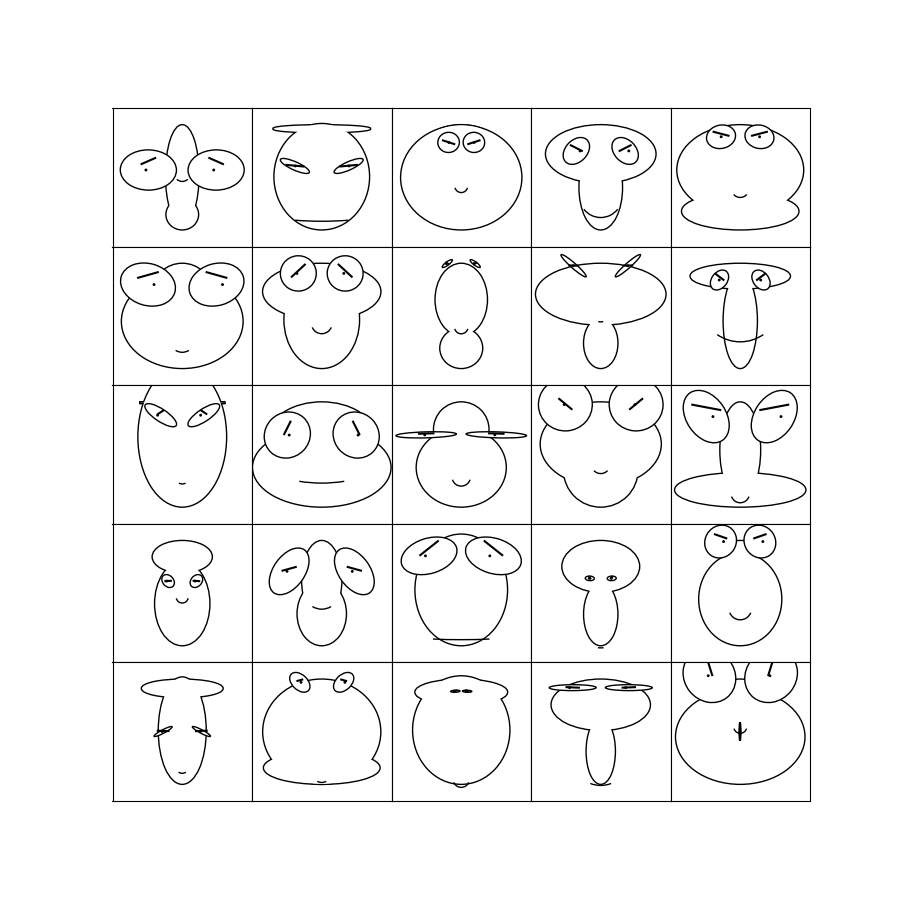

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc
from numpy.random import rand
import numpy as np

def cface(ax, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18):
    """
    This implementation of chernov faces is taken from Abraham Flaxman. You can
    find the original source files here: https://gist.github.com/aflaxman/4043086
    Only minor adjustments have been made.

     x1 = height  of upper face
     x2 = overlap of lower face
     x3 = half of vertical size of face
     x4 = width of upper face
     x5 = width of lower face
     x6 = length of nose
     x7 = vertical position of mouth
     x8 = curvature of mouth
     x9 = width of mouth
     x10 = vertical position of eyes
     x11 = separation of eyes
     x12 = slant of eyes
     x13 = eccentricity of eyes
     x14 = size of eyes
     x15 = position of pupils
     x16 = vertical position of eyebrows
     x17 = slant of eyebrows
     x18 = size of eyebrows
    """

    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9 * (x3 - .5)
    x4 = (x4 + .25)
    x5 = (x5 + .2)
    x6 = .3 * (x6 + .01)
    x8 = 5 * (x8 + .001)
    x11 /= 5
    x12 = 2 * (x12 - .5)
    x13 += .05
    x14 += .1
    x15 = .5 * (x15 - .5)
    x16 = .25 * x16
    x17 = .5 * (x17 - .5)
    x18 = .5 * (x18 + .1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), ec='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), fc='white', ec='none')
    ax.add_artist(e)
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='none')
    ax.add_artist(e)

    # draw nose
    plt.plot([0, 0], [-x6 / 2, x6 / 2], 'k')

    # draw mouth
    p = Arc((0, -x7 + .5 / x8), 1 / x8, 1 / x8, theta1=270 - 180 / np.pi * np.arctan(x8 * x9),
            theta2=270 + 180 / np.pi * np.arctan(x8 * x9))
    ax.add_artist(p)

    # draw eyes
    p = Ellipse((-x11 - x14 / 2, x10), x14, x13 * x14, angle=-180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    p = Ellipse((x11 + x14 / 2, x10), x14, x13 * x14, angle=180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    # draw pupils
    p = Ellipse((-x11 - x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = Ellipse((x11 + x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    ax.plot([-x11 - x14 / 2 - x14 * x18 / 2, -x11 - x14 / 2 + x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')
    ax.plot([x11 + x14 / 2 + x14 * x18 / 2, x11 + x14 / 2 - x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')


fig, axes = plt.subplots(nrows=5, ncols=5, num='Chernoff Faces', figsize=(9, 9))
for ax in axes.flat:
    cface(ax, .9, *rand(17))
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set(xticks=[], yticks=[])

fig.subplots_adjust(hspace=0, wspace=0)


### a) Data Visualization Techniques

Why do we need data visualization techniques and what are techniques to visualize high dimensional data?

YOUR ANSWER HERE

### b) Chernoff faces

Why did Chernoff use faces for his representation? Why not something else, like dogs or houses?

YOUR ANSWER HERE

### c) Alternatives

Explain at least one other data visualization technique from the lecture.

YOUR ANSWER HERE